# Assignment 2 - Descriptive statistics
Probability and Statistics<br>
22.11.2021<br>
G01, Ahmed Al-Tuwaijari<br>
[Helsinki Metropolia University of Applied Sciences](https://www.metropolia.fi/en/)


In [7]:
# Import libraries
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [8]:
# Read the example data
file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
sep = ","
data = pd.read_csv(file, sep, header = None)
data.columns = ['age', 'sex','chest_pain_type','resting_blood_pressure', 'serum_cholesterol','fasting_blood_sugar', 
                'resting_ecg','max_heart_rate','exercise_angina','oldpeak','slope_st_segment','number_of_vessels','thal','heart_disease']

Information about the data: https://www.kaggle.com/ronitf/heart-disease-uci

## Problem 1
Using the example data compare the `age` data for men and women. 

- Calculate the descriptive statistics of age for both groups (men and women).
- Plot the age distribution (=histogram) for both groups (men and women). Pay special attention for the bins settings.

Compare the distributions and the statistical values between the groups.
- How many datapoints there are on each group (men and women)?
- What are the highest and lowest values for each group?
- How much do the mean values differ between men and women?
- Explain on your own words what similarities and differences there are in the age distributions between men and women in this dataset.

In [9]:
# Calculate the descriptive statistics of age for both groups (men and women).
groups = data.groupby('sex')
groups['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0.0,97.0,55.721649,9.370546,34.0,50.0,57.0,63.00,76.0
1.0,206.0,53.834951,8.836838,29.0,47.0,54.5,59.75,77.0


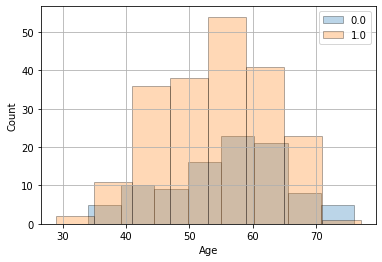

In [10]:
# Plot the age distribution (=histogram) for both groups (men and women). Pay special attention for the bins settings.

data.groupby('sex')['age'].plot.hist(edgecolor='black', alpha = 0.3, bins=8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()

**Your answers**

a) Females: 97
   Males: 206

b) Females 
   Lowest: 34
   Highest: 76
   
   Males
   Lowest: 29
   Highest: 77

c) 55.721649 - 53.834951 = 1.886698
   The difference between mean values is 3.39 %.

d) Males have double data, compared to females. Similarly, that sample was taken with almost the same range of ages in both females and males, and it has a big difference when they are younger. Otherwise, the dataset contains the frequency of male‘s age is higher than female’s age

## Problem 2

Study the *resting blood pressure* values. Group the data by the *chest pain type*.

Coding:
- Find out the mean, standard deviation, min, max, and [quartile values](https://en.wikipedia.org/wiki/Quartile) for the *resting blood pressure* for each group.
- Create a histogram for the *resting blood pressure* for each group. Pay special attention to the bins settings.
- Create a [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) for the *resting blood pressure* for each group.

Questions:
- How many *outliers* are there for the each group?
- Which one of the groups have the lowest mean value?
- How easy it is to see the differences between the groups in the histograms?
- Is histogram or boxplot easier to see the differences between the groups in this case? Explain why in your own words.

Tip:
- You can use the *resting blood pressure* as `column` and the *chest pain type* as `by` parameter in boxplotting.
- You might also need to expand the figure size (see `figsize` parameter in boxplot documentation).

In [11]:
# Find out the mean, standard deviation, min, max, and [quartile values](https://en.wikipedia.org/wiki/Quartile) for the *resting blood pressure* for each group.
group = data.groupby('chest_pain_type')
group["resting_blood_pressure"].describe()

,count,mean,std,min,25%,50%,75%,max
chest_pain_type,,,,,,,,
1.0,23.0,140.869565,19.573415,110.0,122.5,140.0,151.0,178.0
2.0,50.0,128.400000,15.837182,101.0,120.0,128.0,133.5,192.0
3.0,86.0,130.290698,16.548585,94.0,120.0,130.0,140.0,180.0
4.0,144.0,132.201389,18.102884,100.0,120.0,130.0,140.0,200.0


Text(0, 0.5, 'Frequency')

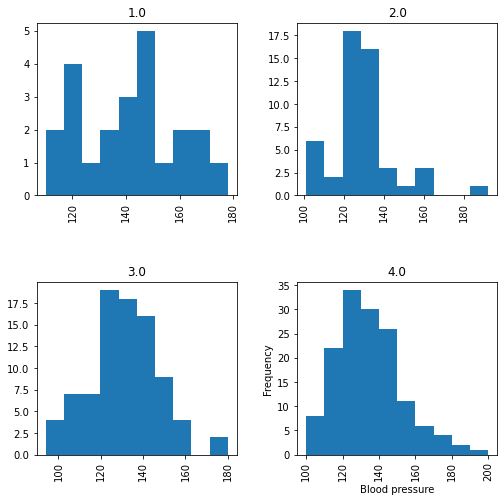

In [12]:
#Create a histogram for the *resting blood pressure* for each group. Pay special attention to the bins settings.
data["resting_blood_pressure"].hist(by=data.chest_pain_type, grid=True, figsize = (8,8))
plt.xlabel("Blood pressure")
plt.ylabel("Frequency")

Text(0.5, 0.98, '')

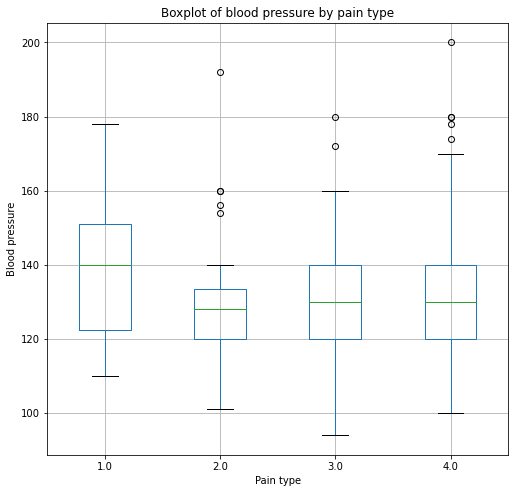

In [13]:
#Create a [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) for the *resting blood pressure* for each group.
data.boxplot(column=['resting_blood_pressure'], by='chest_pain_type', figsize = (8,8))
plt.xlabel("Pain type")
plt.ylabel("Blood pressure")
plt.title("Boxplot of blood pressure by pain type")
plt.suptitle('')

**Answers**:

a) Using the boxplot we can determine that pain type 2 has 4, type 3 has 2, and type 4 has another 4 outliers, all in the high range.

b) Type 2 as they have a mean blood pressure of 128.4.

c) Fairly well, eg. you can recognise how type 1 is distributed far more unevenly than the rest, how type 1 is the most consistent around 130 etc., which are proven by the standard deviation as well.

d) The boxplot is probably more informative in the sense that it more accurately tells you about the quartiles and outliersm it tells you the median etc. 

## Problem 3
Compare the *serum cholesterol* to the *resting blood pressure*.

Coding:
- Create a scatter-plot where *resting blood pressure* is in the x-axis and *serum cholesterol* in y-axis.
- Count how many percentage of the datapoints have *serum cholesterol* higher than 350 mg/ml.
- Count how many percentage of the datatpoints have *resting blood pressure* higher than 190 mmHg.

Questions:
- By studying the graph evaluate if there are any outliers. Explain in your own words which are the outliers and why.
- How strongly the *resting blood pressure* and *serum cholesterol* are associated? Explain why in your own words.

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='serum_cholesterol'>

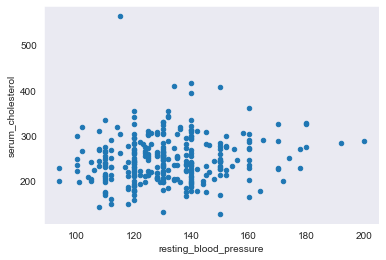

In [14]:
# Create a scatter-plot where resting blood pressure is in the x-axis and the serum cholesterol in y-axis
data.plot.scatter(x = 'resting_blood_pressure', y = 'serum_cholesterol')

In [11]:
#Count how many percentage of the datapoints have serum cholesterol higher than 350 mg/ml.
amount = (data['serum_cholesterol'] > 350)
amount = len(data[amount])
total = len(data['serum_cholesterol'])
percentage = (amount/total) * 100
percentage

2.6402640264026402

In [12]:
#Count how many percentage of the datatpoints have resting blood pressure higher than 190 mmHg.
amount = (data['resting_blood_pressure'] > 190)
amount = len(data[amount])
total = len(data['resting_blood_pressure'])
percentage = (amount/total)* 100
percentage

0.6600660066006601

**Answers**:

a)From looking at the graph, the point is over 500 and approximately 115 of serum cholesterol and resting blood pressure is very clear an outlier, respectively. However, it still has other 2 points at the right side of the graph can be considered as outliers, they locate at above 190 of resting blood pressure

b)High blood pressure (hypertension) and high cholesterol also are linked. And the data shows it is a bit high, so it has a probability that resting blood sugar and serum cholesterol are associated. 